## Analyzing, Ploting, Visualizing

The goal of this notebook is to analyze the data I have now cleaned, using statistics. I will also use imported libraries to visualy display my findings. 

Questions of Focus:

* What are the most popular movies that made the most money? (The top 100)
* What are the genres of the most popular movies? (What type of movies are making the money)
* Who are the production companies that make these moveis? (Who is competition in this industry)

In [1]:
# Importing the libraries I will need for my analysis
# Check resources below for more info on them 

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import numpy as np
import statistics 

from textwrap import wrap
from matplotlib.pyplot import rcParams

import operator


In [2]:
df = pd.read_csv('../CSV_Files/Official_Movie_DataFrame') # Reading my csv file of my cleaned data into this notebook

In [3]:
df.head() # Viewing the data that I have

,adult,budget,genres,id,popularity,production_companies,release_date,revenue,runtime,title,vote_average,vote_count,profit
0,False,30000000,"['Animation', 'Comedy', 'Family']",862,21.946943,['Pixar Animation Studios'],1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,343554033.0
1,False,65000000,"['Adventure', 'Fantasy', 'Family']",8844,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...",1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,197797249.0
2,False,16000000,"['Comedy', 'Drama', 'Romance']",31357,3.859495,['Twentieth Century Fox Film Corporation'],1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,65452156.0
3,False,60000000,"['Action', 'Crime', 'Drama', 'Thriller']",949,17.924927,"['Regency Enterprises', 'Forward Pass', 'Warne...",1995-12-15,187436818.0,170.0,Heat,7.7,1886.0,127436818.0
4,False,35000000,"['Action', 'Adventure', 'Thriller']",9091,5.231580,"['Universal Pictures', 'Imperial Entertainment...",1995-12-22,64350171.0,106.0,Sudden Death,5.5,174.0,29350171.0


In [4]:
df.info() # Viewing the columns and their data types to see what I'm dealing with (refreshing my memory)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5381 entries, 0 to 5380
Data columns (total 13 columns):
adult                   5381 non-null bool
budget                  5381 non-null int64
genres                  5381 non-null object
id                      5381 non-null int64
popularity              5381 non-null float64
production_companies    5381 non-null object
release_date            5381 non-null object
revenue                 5381 non-null float64
runtime                 5380 non-null float64
title                   5381 non-null object
vote_average            5381 non-null float64
vote_count              5381 non-null float64
profit                  5381 non-null float64
dtypes: bool(1), float64(6), int64(2), object(4)
memory usage: 509.8+ KB


## Plan of Attack

1. I would like to sort my data by profit in a descendind order. This way the most popular movies that made the most money will be a the top of the list 

2. Grab the first 100 movies from that list

3. Use the list of 100 to answer my questions via coding 

4. Create visuals for a non coder to understand the coded answers to my questions

## Analyze

In [5]:
# In the code below what I did was sort my dataframe fro most profitable movie to least profitable movie
# I then used head() to get the fist 100 movies of that list
# Lastly I assigned this new list to a variable

df_100 = df.sort_values(by=['profit'], ascending=False).head(100)

# This way I have a list to work with, without affecting my original dataframe

In [6]:
df_100.head().append(df_100.tail()) # Viewing my new list top 5 and last 5 combined

,adult,budget,genres,id,popularity,production_companies,release_date,revenue,runtime,title,vote_average,vote_count,profit
3495,False,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,185.070892,"['Ingenious Film Partners', 'Twentieth Century...",2009-12-10,2.787965e+09,162.0,Avatar,7.2,12114.0,2.550965e+09
4643,False,245000000,"['Action', 'Adventure', 'Science Fiction', 'Fa...",140607,31.626013,"['Lucasfilm', 'Truenorth Productions', 'Bad Ro...",2015-12-15,2.068224e+09,136.0,Star Wars: The Force Awakens,7.5,7993.0,1.823224e+09
590,False,200000000,"['Drama', 'Romance', 'Thriller']",597,26.889070,"['Paramount Pictures', 'Twentieth Century Fox ...",1997-11-18,1.845034e+09,194.0,Titanic,7.5,7770.0,1.645034e+09
4586,False,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",135397,32.790475,"['Universal Studios', 'Amblin Entertainment', ...",2015-06-09,1.513529e+09,124.0,Jurassic World,6.5,8842.0,1.363529e+09
4711,False,190000000,['Action'],168259,27.275687,"['Universal Pictures', 'Original Film', 'Fuji ...",2015-04-01,1.506249e+09,137.0,Furious 7,7.3,4253.0,1.316249e+09
3192,False,52000000,"['Comedy', 'Romance']",11631,10.534437,"['Universal Pictures', 'Internationale Filmpro...",2008-07-03,6.098416e+08,108.0,Mamma Mia!,6.4,1435.0,5.578416e+08
5238,False,75000000,"['Animation', 'Comedy', 'Drama', 'Family', 'Mu...",335797,20.045673,"['Universal Pictures', 'Fuji Television Networ...",2016-11-23,6.324437e+08,108.0,Sing,6.8,2363.0,5.574437e+08
3961,False,145000000,"['Action', 'Thriller', 'Adventure']",56292,14.258430,"['Paramount Pictures', 'Skydance Productions',...",2011-12-07,6.947134e+08,133.0,Mission: Impossible - Ghost Protocol,6.8,4026.0,5.497134e+08
4430,False,170000000,"['Action', 'Adventure', 'Science Fiction']",100402,18.717704,['Marvel Studios'],2014-03-20,7.147666e+08,136.0,Captain America: The Winter Soldier,7.6,5881.0,5.447666e+08
4261,False,200000000,"['Animation', 'Family']",62211,16.267502,"['Walt Disney Pictures', 'Pixar Animation Stud...",2013-06-20,7.435596e+08,104.0,Monsters University,7.0,3622.0,5.435596e+08


## Check-in
* What are the most popular movies that made the most money? (The top 100)  **Complete**
* What are the genres of the most popular movies? (What type of movies are making the money)
* Who are the production companies that make these moveis? (Who is competition in this industry)

In [7]:
df_100_genres = df_100['genres'] # Locating the genres of the top 100 and assigning them to a variable
df_100_genres

3495    ['Action', 'Adventure', 'Fantasy', 'Science Fi...
4643    ['Action', 'Adventure', 'Science Fiction', 'Fa...
590                      ['Drama', 'Romance', 'Thriller']
4586    ['Action', 'Adventure', 'Science Fiction', 'Th...
4711                                           ['Action']
                              ...                        
3192                                ['Comedy', 'Romance']
5238    ['Animation', 'Comedy', 'Drama', 'Family', 'Mu...
3961                  ['Action', 'Thriller', 'Adventure']
4430           ['Action', 'Adventure', 'Science Fiction']
4261                              ['Animation', 'Family']
Name: genres, Length: 100, dtype: object

## Check-in
* What are the most popular movies that made the most money? (The top 100)  **Complete**
* What are the genres of the most popular movies? (What type of movies are making the money) **Complete**
* Who are the production companies that make these moveis? (Who is competition in this industry)

In [8]:
df_100_pro_comp = df_100['production_companies']
df_100_pro_comp # Locating the production companies of the top 100 and assigning them to a variable

3495    ['Ingenious Film Partners', 'Twentieth Century...
4643    ['Lucasfilm', 'Truenorth Productions', 'Bad Ro...
590     ['Paramount Pictures', 'Twentieth Century Fox ...
4586    ['Universal Studios', 'Amblin Entertainment', ...
4711    ['Universal Pictures', 'Original Film', 'Fuji ...
                              ...                        
3192    ['Universal Pictures', 'Internationale Filmpro...
5238    ['Universal Pictures', 'Fuji Television Networ...
3961    ['Paramount Pictures', 'Skydance Productions',...
4430                                   ['Marvel Studios']
4261    ['Walt Disney Pictures', 'Pixar Animation Stud...
Name: production_companies, Length: 100, dtype: object

## Check-in
* What are the most popular movies that made the most money? (The top 100)  **Complete**
* What are the genres of the most popular movies? (What type of movies are making the money) **Complete**
* Who are the production companies that make these moveis? (Who is competition in this industry) **Complete**

## Plan of Attack Recap

1. I would like to sort my data by profit in a descendind order, this way the most popular movies that made the most money will be a the top **Complete**

2. Grab the first 100 movies from that list **Complete**

3. Use the list of 100 to answer my questions via coding **Complete**

4. Create visuals for a non coder to understand the coded answers to my questions

## Ploting & Visualizing 

## Houston we have a problem! My prduction column and genres column are full of list!!

In [9]:
df_100_genres.head(10).unique() # All the values for genres, in the top 10 movies (no repeats)


array(["['Action', 'Adventure', 'Fantasy', 'Science Fiction']",
       "['Action', 'Adventure', 'Science Fiction', 'Fantasy']",
       "['Drama', 'Romance', 'Thriller']",
       "['Action', 'Adventure', 'Science Fiction', 'Thriller']",
       "['Action']", "['Science Fiction', 'Action', 'Adventure']",
       "['Family', 'Fantasy', 'Adventure']",
       "['Action', 'Adventure', 'Science Fiction']",
       "['Animation', 'Adventure', 'Family']",
       "['Family', 'Fantasy', 'Romance']"], dtype=object)

In [10]:
df_100_pro_comp.head(10).unique() # All the values for production companies, in the top 10 movies (no repeats)

array(["['Ingenious Film Partners', 'Twentieth Century Fox Film Corporation', 'Dune Entertainment', 'Lightstorm Entertainment']",
       "['Lucasfilm', 'Truenorth Productions', 'Bad Robot']",
       "['Paramount Pictures', 'Twentieth Century Fox Film Corporation', 'Lightstorm Entertainment']",
       "['Universal Studios', 'Amblin Entertainment', 'Legendary Pictures', 'Fuji Television Network', 'Dentsu']",
       "['Universal Pictures', 'Original Film', 'Fuji Television Network', 'Dentsu', 'One Race Films', 'China Film Co.', 'Québec Production Services Tax Credit', 'Media Rights Capital (MRC)', 'Abu Dhabi Film Commission', 'Colorado Office of Film, Television & Media']",
       "['Paramount Pictures', 'Marvel Studios']",
       "['Warner Bros.', 'Heyday Films']",
       "['Marvel Studios', 'Prime Focus', 'Revolution Sun Studios']",
       "['Walt Disney Pictures', 'Walt Disney Animation Studios']",
       "['Walt Disney Pictures', 'Mandeville Films']"], dtype=object)

## Fixing The Problem: Genres

In [11]:
'''This for loop will take my genres column and evaluate it
This will then return a list instead of a list of list wrapped in a string'''

df_100.genres = df_100.genres.apply(lambda x: eval(x))
genre_list = []
for genres in df_100.genres:
    for genre in genres:
        if genre != genre_list:
            genre_list.append(genre)

In [12]:
'''After forming my new list from the above cell I will then take that list to create columns of the genres 
The columns will be booleans that reflect if a movie in the row has that genre or not in its description'''
genre_list
for genre in genre_list:
    df_100[genre] = df_100['genres'].apply(lambda x: genre in x)
    
df_100.head()

,adult,budget,genres,id,popularity,production_companies,release_date,revenue,runtime,title,...,Science Fiction,Drama,Romance,Thriller,Family,Animation,Comedy,Crime,Mystery,Music
3495,False,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,185.070892,"['Ingenious Film Partners', 'Twentieth Century...",2009-12-10,2.787965e+09,162.0,Avatar,...,True,False,False,False,False,False,False,False,False,False
4643,False,245000000,"[Action, Adventure, Science Fiction, Fantasy]",140607,31.626013,"['Lucasfilm', 'Truenorth Productions', 'Bad Ro...",2015-12-15,2.068224e+09,136.0,Star Wars: The Force Awakens,...,True,False,False,False,False,False,False,False,False,False
590,False,200000000,"[Drama, Romance, Thriller]",597,26.889070,"['Paramount Pictures', 'Twentieth Century Fox ...",1997-11-18,1.845034e+09,194.0,Titanic,...,False,True,True,True,False,False,False,False,False,False
4586,False,150000000,"[Action, Adventure, Science Fiction, Thriller]",135397,32.790475,"['Universal Studios', 'Amblin Entertainment', ...",2015-06-09,1.513529e+09,124.0,Jurassic World,...,True,False,False,True,False,False,False,False,False,False
4711,False,190000000,[Action],168259,27.275687,"['Universal Pictures', 'Original Film', 'Fuji ...",2015-04-01,1.506249e+09,137.0,Furious 7,...,False,False,False,False,False,False,False,False,False,False


## Fixing The Problem: Production Companies 

In [13]:
'''This for loop will take my production companies column and evaluate it
This will then return a list instead of a list of list wrapped in a string'''

df_100_pro_comp = df_100_pro_comp.apply(lambda x: eval(x))
production_list = []
for companyL in df_100_pro_comp:
    for company in companyL:
        if company != production_list:
            production_list.append(company)
            


In [14]:
'''After forming my new list from the above cell this new for loop will then take that list to create columns 
of the production companies. 
The columns will be booleans that reflect if a movie in the row has that genre or not in its description'''

production_list
for company in production_list:
    df_100[company] = df_100['production_companies'].apply(lambda x: company in x)
    
df_100.columns # Checking to see if the columns of production companies were added

Index(['adult', 'budget', 'genres', 'id', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'title',
       ...
       'Walden Media', 'Infinitum Nihil', 'thinkfilm', 'SprocketHeads',
       'Internationale Filmproduktion Richter', 'Playtone', 'Littlestar',
       'Skydance Productions', 'TC Productions', 'Kontsept Film Company'],
      dtype='object', length=157)

## Chart: What Movie Genre Is The Most Popular  
Before I begin to plot my data I need to create a small dataframe that have the following:
* Title of the movie
* The profit of the movie 
* The genres that describe the movie

In [15]:
list(set(genre_list)) # Taking care of the repeats

['Animation',
 'Family',
 'Music',
 'Adventure',
 'Thriller',
 'Drama',
 'Romance',
 'Crime',
 'Mystery',
 'Comedy',
 'Fantasy',
 'Action',
 'Science Fiction']

## Creating Subsets of Data

For this section of the notebook, I wanted to create a subset of data to plot. I will create one for genres columns first, and then the production companies columns.

In [16]:
df_plot_genres = df_100.copy().set_index('title') # Setting the index to the movie titles of the df_100

In [17]:
# Slicing the genre columns to select the gernre columns that are needed for ploting 
# and setting it equal to a variable 
df_plot_genres_cols = df_100.columns[12:26]

In [18]:
# Creating a dataframe that has the columns and indexs from cells above
df_plot_genres = df_plot_genres[df_plot_genres_cols] 


In [19]:
df_plot_genres.head() # Veiwing the dataframe 

,profit,Action,Adventure,Fantasy,Science Fiction,Drama,Romance,Thriller,Family,Animation,Comedy,Crime,Mystery,Music
title,,,,,,,,,,,,,,
Avatar,2.550965e+09,True,True,True,True,False,False,False,False,False,False,False,False,False
Star Wars: The Force Awakens,1.823224e+09,True,True,True,True,False,False,False,False,False,False,False,False,False
Titanic,1.645034e+09,False,False,False,False,True,True,True,False,False,False,False,False,False
Jurassic World,1.363529e+09,True,True,False,True,False,False,True,False,False,False,False,False,False
Furious 7,1.316249e+09,True,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
'''This for loop will create a dictionary where the key is the genre of the movie 
and the value is the sum of the profit made as a whole for the df_100 genres'''
unique_genre_list = list(set(genre_list))
genre_profit_dict = {}

for genre in unique_genre_list:
        genre_profit_dict[genre] = df_plot_genres[df_plot_genres[genre] == True]['profit'].sum()

In [21]:
genre_profit_dict # Viewing the Dictionary

{'Animation': 16672040301.0,
 'Family': 28378490173.0,
 'Music': 557443719.0,
 'Adventure': 60934658863.0,
 'Thriller': 11507031699.0,
 'Drama': 10522741625.0,
 'Romance': 7108738011.0,
 'Crime': 4478216821.0,
 'Mystery': 2729372253.0,
 'Comedy': 14576813306.0,
 'Fantasy': 33221158644.0,
 'Action': 41575559290.0,
 'Science Fiction': 25463914681.0}

In [22]:
genre_profit_dict_sort = sorted(genre_profit_dict.items(), key=operator.itemgetter(1)) 
genre_profit_dict_sort # Sorting the dictionary from the most profitable genre to the least profitable genre

[('Music', 557443719.0),
 ('Mystery', 2729372253.0),
 ('Crime', 4478216821.0),
 ('Romance', 7108738011.0),
 ('Drama', 10522741625.0),
 ('Thriller', 11507031699.0),
 ('Comedy', 14576813306.0),
 ('Animation', 16672040301.0),
 ('Science Fiction', 25463914681.0),
 ('Family', 28378490173.0),
 ('Fantasy', 33221158644.0),
 ('Action', 41575559290.0),
 ('Adventure', 60934658863.0)]

In [23]:
'''The loop below will create two list
it will then pull out of the dictionary made in the cell above 
the keys and place them in the genres list 
and then pull the values and place them in the sum_profits list'''

genres = []
sum_profits = []

for item in range(len(genre_profit_dict_sort)):
    genres.append(genre_profit_dict_sort[item][0])
    sum_profits.append(genre_profit_dict_sort[item][1])

In [24]:
genres # Veiwing the genres list 

['Music',
 'Mystery',
 'Crime',
 'Romance',
 'Drama',
 'Thriller',
 'Comedy',
 'Animation',
 'Science Fiction',
 'Family',
 'Fantasy',
 'Action',
 'Adventure']

In [25]:
sum_profits # Veiwing the sum of profits list

[557443719.0,
 2729372253.0,
 4478216821.0,
 7108738011.0,
 10522741625.0,
 11507031699.0,
 14576813306.0,
 16672040301.0,
 25463914681.0,
 28378490173.0,
 33221158644.0,
 41575559290.0,
 60934658863.0]

<BarContainer object of 13 artists>

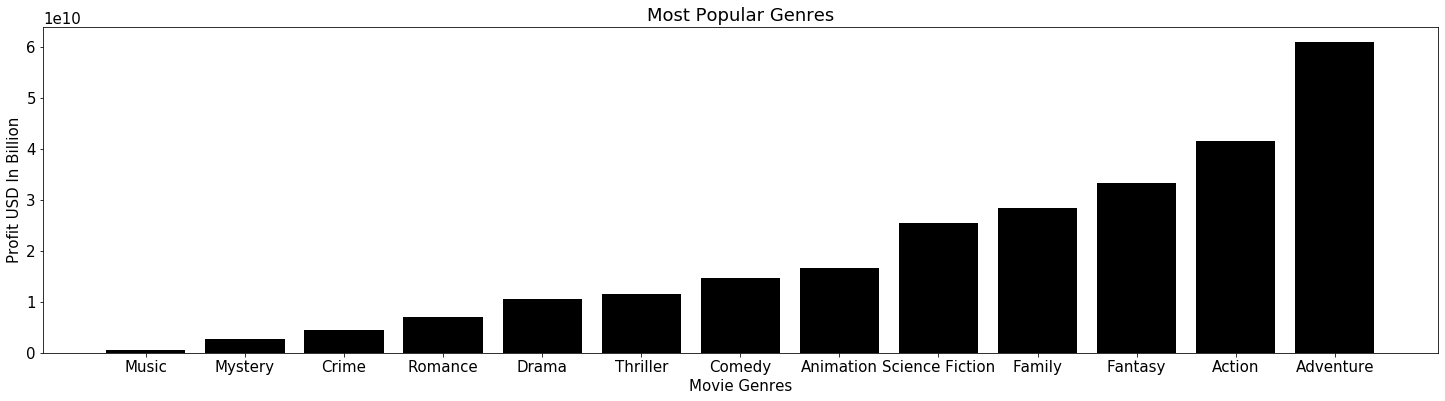

In [26]:
'''Below you will find a visualization of which genres made the most money
The visualization is of a bar chart that has the names of genres at the bottom
and the amount of money it made in US Dollars'''


x= genres
y= sum_profits


plt.figure(figsize=(25,6))

plt.rc('font', size=15)

plt.title('Most Popular Genres')
plt.xlabel('Movie Genres')
plt.ylabel('Profit USD In Billion')
plt.bar(x,y, color='black')



# plt.tick_params(axis='x', rotation=70)
# plt.xticks(rotation="vertical")


# production_list & profit 
# genre_list & profit

##  Chart: Production Company Who Made The Most Popular  
Below I will repeat what I did for genres to the production companies column.

In [27]:
df_plot_companies = df_100.copy().set_index('title') 
# Setting the index to the movie titles of the df_100

In [28]:
# Slicing the genre columns to select the gernre columns that are needed for ploting 
# and setting it equal to a variable 
df_plot_comp_cols = df_100.columns[27:]
df_plot_comp_cols

Index(['Twentieth Century Fox Film Corporation', 'Dune Entertainment',
       'Lightstorm Entertainment', 'Lucasfilm', 'Truenorth Productions',
       'Bad Robot', 'Paramount Pictures', 'Universal Studios',
       'Amblin Entertainment', 'Legendary Pictures',
       ...
       'Walden Media', 'Infinitum Nihil', 'thinkfilm', 'SprocketHeads',
       'Internationale Filmproduktion Richter', 'Playtone', 'Littlestar',
       'Skydance Productions', 'TC Productions', 'Kontsept Film Company'],
      dtype='object', length=130)

In [29]:
# Creating a dataframe that has the columns and indexs from cells above
df_plot_pro_comp = df_plot_companies[df_plot_comp_cols] 

In [30]:
df_plot_pro_comp.head() # Veiwing the dataframe 

,Twentieth Century Fox Film Corporation,Dune Entertainment,Lightstorm Entertainment,Lucasfilm,Truenorth Productions,Bad Robot,Paramount Pictures,Universal Studios,Amblin Entertainment,Legendary Pictures,...,Walden Media,Infinitum Nihil,thinkfilm,SprocketHeads,Internationale Filmproduktion Richter,Playtone,Littlestar,Skydance Productions,TC Productions,Kontsept Film Company
title,,,,,,,,,,,,,,,,,,,,,
Avatar,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Star Wars: The Force Awakens,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Titanic,True,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Jurassic World,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
Furious 7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
'''This for loop will create a dictionary where the key is the production company of the movie 
and the value is the sum of the profit made as a whole for the df_100 production companies'''
unique_procomp_list = list(set(production_list))
production_profit_dict = {}

for company in unique_procomp_list:
        production_profit_dict[company] = df_plot_companies[df_plot_companies[company] == True]['profit'].sum()

In [32]:
production_profit_dict # Viewing the Dictionary

{'Sunswept Entertainment': 2601490665.0,
 'TC Productions': 549713380.0,
 'Zanuck Company, The': 825491110.0,
 'Prime Focus': 1125403694.0,
 'Fairview Entertainment': 791550600.0,
 'SprocketHeads': 559709780.0,
 'Québec Production Services Tax Credit': 1316249360.0,
 'Dentsu': 4666359676.0,
 'Colorado Office of Film, Television & Media': 1316249360.0,
 'Kinberg Genre': 725112979.0,
 'Temple Hill Entertainment': 2601490665.0,
 "The Donners' Company": 725112979.0,
 'Heyday Films': 5602267094.0,
 'Stereo D': 856057273.0,
 'DC Entertainment': 3519938238.0,
 'Revolution Sun Studios': 4405857808.0,
 'The Kennedy/Marshall Company': 632806292.0,
 'Lionsgate': 1960734373.0,
 'Ingenious Film Partners': 2550965087.0,
 'One Race Productions': 628679850.0,
 'Littlestar': 557841637.0,
 'TSBD Louisiana': 602171856.0,
 'Legendary Pictures': 3683559117.0,
 'Skylark Productions': 642820459.0,
 'Illumination Entertainment': 4275457887.0,
 'Bulletproof Cupid': 603328629.0,
 'Kontsept Film Company': 549713

In [42]:
production_profit_dict_sort = sorted(production_profit_dict.items(), key=operator.itemgetter(1)) 
production_profit_dict_sort 
# Sorting the dictionary from the most profitable production company to the least profitable genre

[('TC Productions', 549713380.0),
 ('Kontsept Film Company', 549713380.0),
 ('Skydance Productions', 549713380.0),
 ('Littlestar', 557841637.0),
 ('Playtone', 557841637.0),
 ('Internationale Filmproduktion Richter', 557841637.0),
 ('SprocketHeads', 559709780.0),
 ('thinkfilm', 559709780.0),
 ('Infinitum Nihil', 564191988.0),
 ('Walden Media', 568806957.0),
 ('Walt Disney Productions', 569000000.0),
 ('RKO Radio Pictures', 569000000.0),
 ('The Mark Gordon Company', 569653595.0),
 ('Farewell Productions', 569653595.0),
 ('Icon Productions', 581899420.0),
 ('Heineken Branded Entertainment', 588599701.0),
 ('Village Roadshow Pictures', 588599701.0),
 ('Silver Pictures', 588599701.0),
 ('NPV Entertainment', 588599701.0),
 ('TSBD Louisiana', 602171856.0),
 ('TSBD Productions', 602171856.0),
 ('Total Entertainment', 602171856.0),
 ('Zohar International', 602171856.0),
 ('TSBD Canada Productions', 602171856.0),
 ('Bulletproof Cupid', 603328629.0),
 ('Esperanto Filmoj', 611392705.0),
 ('RatPac-

In [34]:
'''The loop below will create two list
it will then pull out of the dictionary made in the cell above 
the keys and place them in the production company list 
and then pull the values and place them in the _profits list'''

production_company = []
_profits = []

for item in range(len(production_profit_dict_sort)):
    production_company.append(production_profit_dict_sort[item][0])
    _profits.append(production_profit_dict_sort[item][1])

In [35]:
production_company # Veiwing the production company list 

['TC Productions',
 'Kontsept Film Company',
 'Skydance Productions',
 'Littlestar',
 'Playtone',
 'Internationale Filmproduktion Richter',
 'SprocketHeads',
 'thinkfilm',
 'Infinitum Nihil',
 'Walden Media',
 'Walt Disney Productions',
 'RKO Radio Pictures',
 'The Mark Gordon Company',
 'Farewell Productions',
 'Icon Productions',
 'Heineken Branded Entertainment',
 'Village Roadshow Pictures',
 'Silver Pictures',
 'NPV Entertainment',
 'TSBD Louisiana',
 'TSBD Productions',
 'Total Entertainment',
 'Zohar International',
 'TSBD Canada Productions',
 'Bulletproof Cupid',
 'Esperanto Filmoj',
 'RatPac-Dune Entertainment',
 'One Race Productions',
 'Etalon film',
 'F & F VI Productions A.I.E',
 'The Kennedy/Marshall Company',
 'Spyglass Entertainment',
 'Barry Mendel Productions',
 'Hollywood Pictures',
 'B24',
 'Danjaq',
 'Skylark Productions',
 'Government of Malta',
 'Imagine Entertainment',
 'Wanda Pictures',
 'TENCENT PICTURES',
 '3Foot7',
 'Kinberg Genre',
 "The Donners' Company",

In [36]:
_profits # Veiwing the profit list 

[549713380.0,
 549713380.0,
 549713380.0,
 557841637.0,
 557841637.0,
 557841637.0,
 559709780.0,
 559709780.0,
 564191988.0,
 568806957.0,
 569000000.0,
 569000000.0,
 569653595.0,
 569653595.0,
 581899420.0,
 588599701.0,
 588599701.0,
 588599701.0,
 588599701.0,
 602171856.0,
 602171856.0,
 602171856.0,
 602171856.0,
 602171856.0,
 603328629.0,
 611392705.0,
 623260194.0,
 628679850.0,
 628679850.0,
 628679850.0,
 632806292.0,
 632806292.0,
 632806292.0,
 632806292.0,
 635674609.0,
 635674609.0,
 642820459.0,
 642820459.0,
 642820459.0,
 671580447.0,
 671580447.0,
 706019788.0,
 725112979.0,
 725112979.0,
 725112979.0,
 725112979.0,
 743241776.0,
 745921036.0,
 769838758.0,
 791550600.0,
 825491110.0,
 825491110.0,
 825491110.0,
 828570889.0,
 856057273.0,
 856057273.0,
 856057273.0,
 881405097.0,
 881405097.0,
 903304495.0,
 903304495.0,
 903304495.0,
 928746996.0,
 1102886337.0,
 1125403694.0,
 1186521487.0,
 1216637967.0,
 1290318809.0,
 1290318809.0,
 1294840641.0,
 1311622863.0

<BarContainer object of 5 artists>

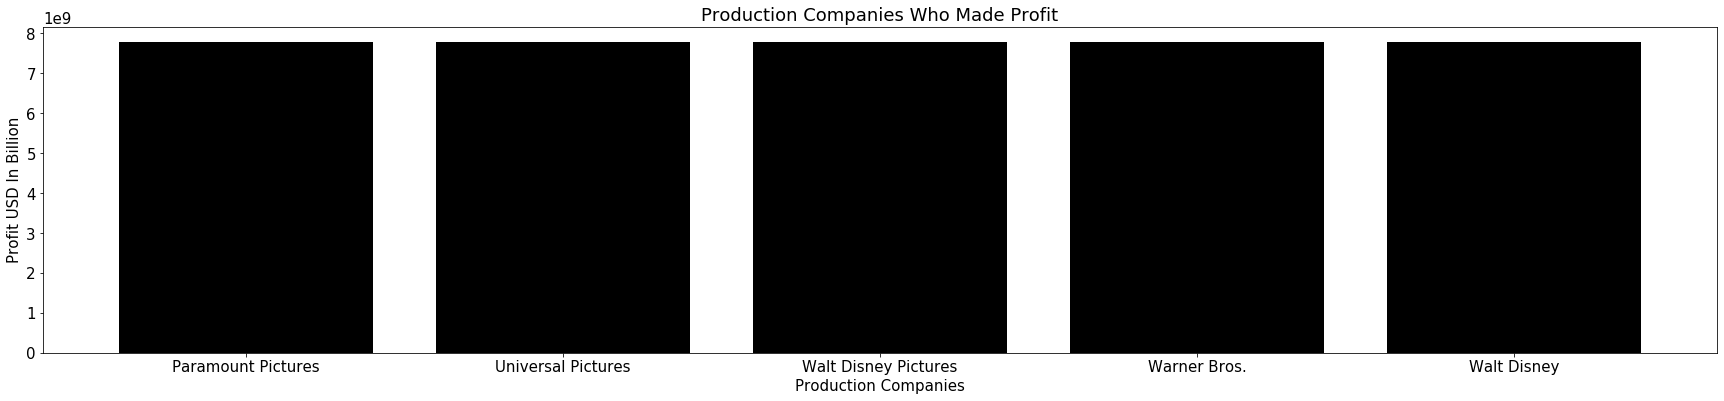

In [47]:
'''Below you will find a visualization of which genres made the most money
The visualization is of a bar chart that has the names of genres at the bottom
and the amount of money it made in US Dollars'''


x= production_company[-5:]
y= _profits[-5]


plt.figure(figsize=(30,6))

plt.rc('font', size=15)



plt.title('Production Companies Who Made Profit')
plt.xlabel('Production Companies')
plt.ylabel('Profit USD In Billion')
plt.bar(x,y, color='black')

## Plan of Attack Recap

1. I would like to sort my data by profit in a descendind order, this way the most popular movies that made the most money will be a the top **Complete**

2. Grab the first 100 movies from that list **Complete**

3. Use the list of 100 to answer my questions via coding **Complete**

4. Create visuals for a non coder to understand the coded answers to my questions **Complete** 

                        *** Now It's Time To Make A Presentation!!! ***

## Resources 

## Original Source For Data

https://www.kaggle.com/rounakbanik/the-movies-dataset#movies_metadata.csv


## Libraries 

Statistics:

https://docs.python.org/3/library/statistics.html


Numpy:

https://numpy.org/


Seaborn:

https://seaborn.pydata.org/introduction.html


Matplotlib:

https://matplotlib.org/users/index.html


Pandas:

https://pandas.pydata.org/docs/user_guide/index.html


## Data Manipulation 

Sorting by Columns:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html



## Plot Styling

Font Size: 

https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot

Font Rotation:

https://matplotlib.org/3.1.0/tutorials/text/text_intro.html

## Human Resources 

Lindsey Berlin Flatiron School Data Science Coach

Bryan Arnold Flatiron School Data Science Lead Instrutor 

Flatiron School 021720 Cohort 

